##  Project KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
knn_df = pd.read_csv('Sample')

In [4]:
knn_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


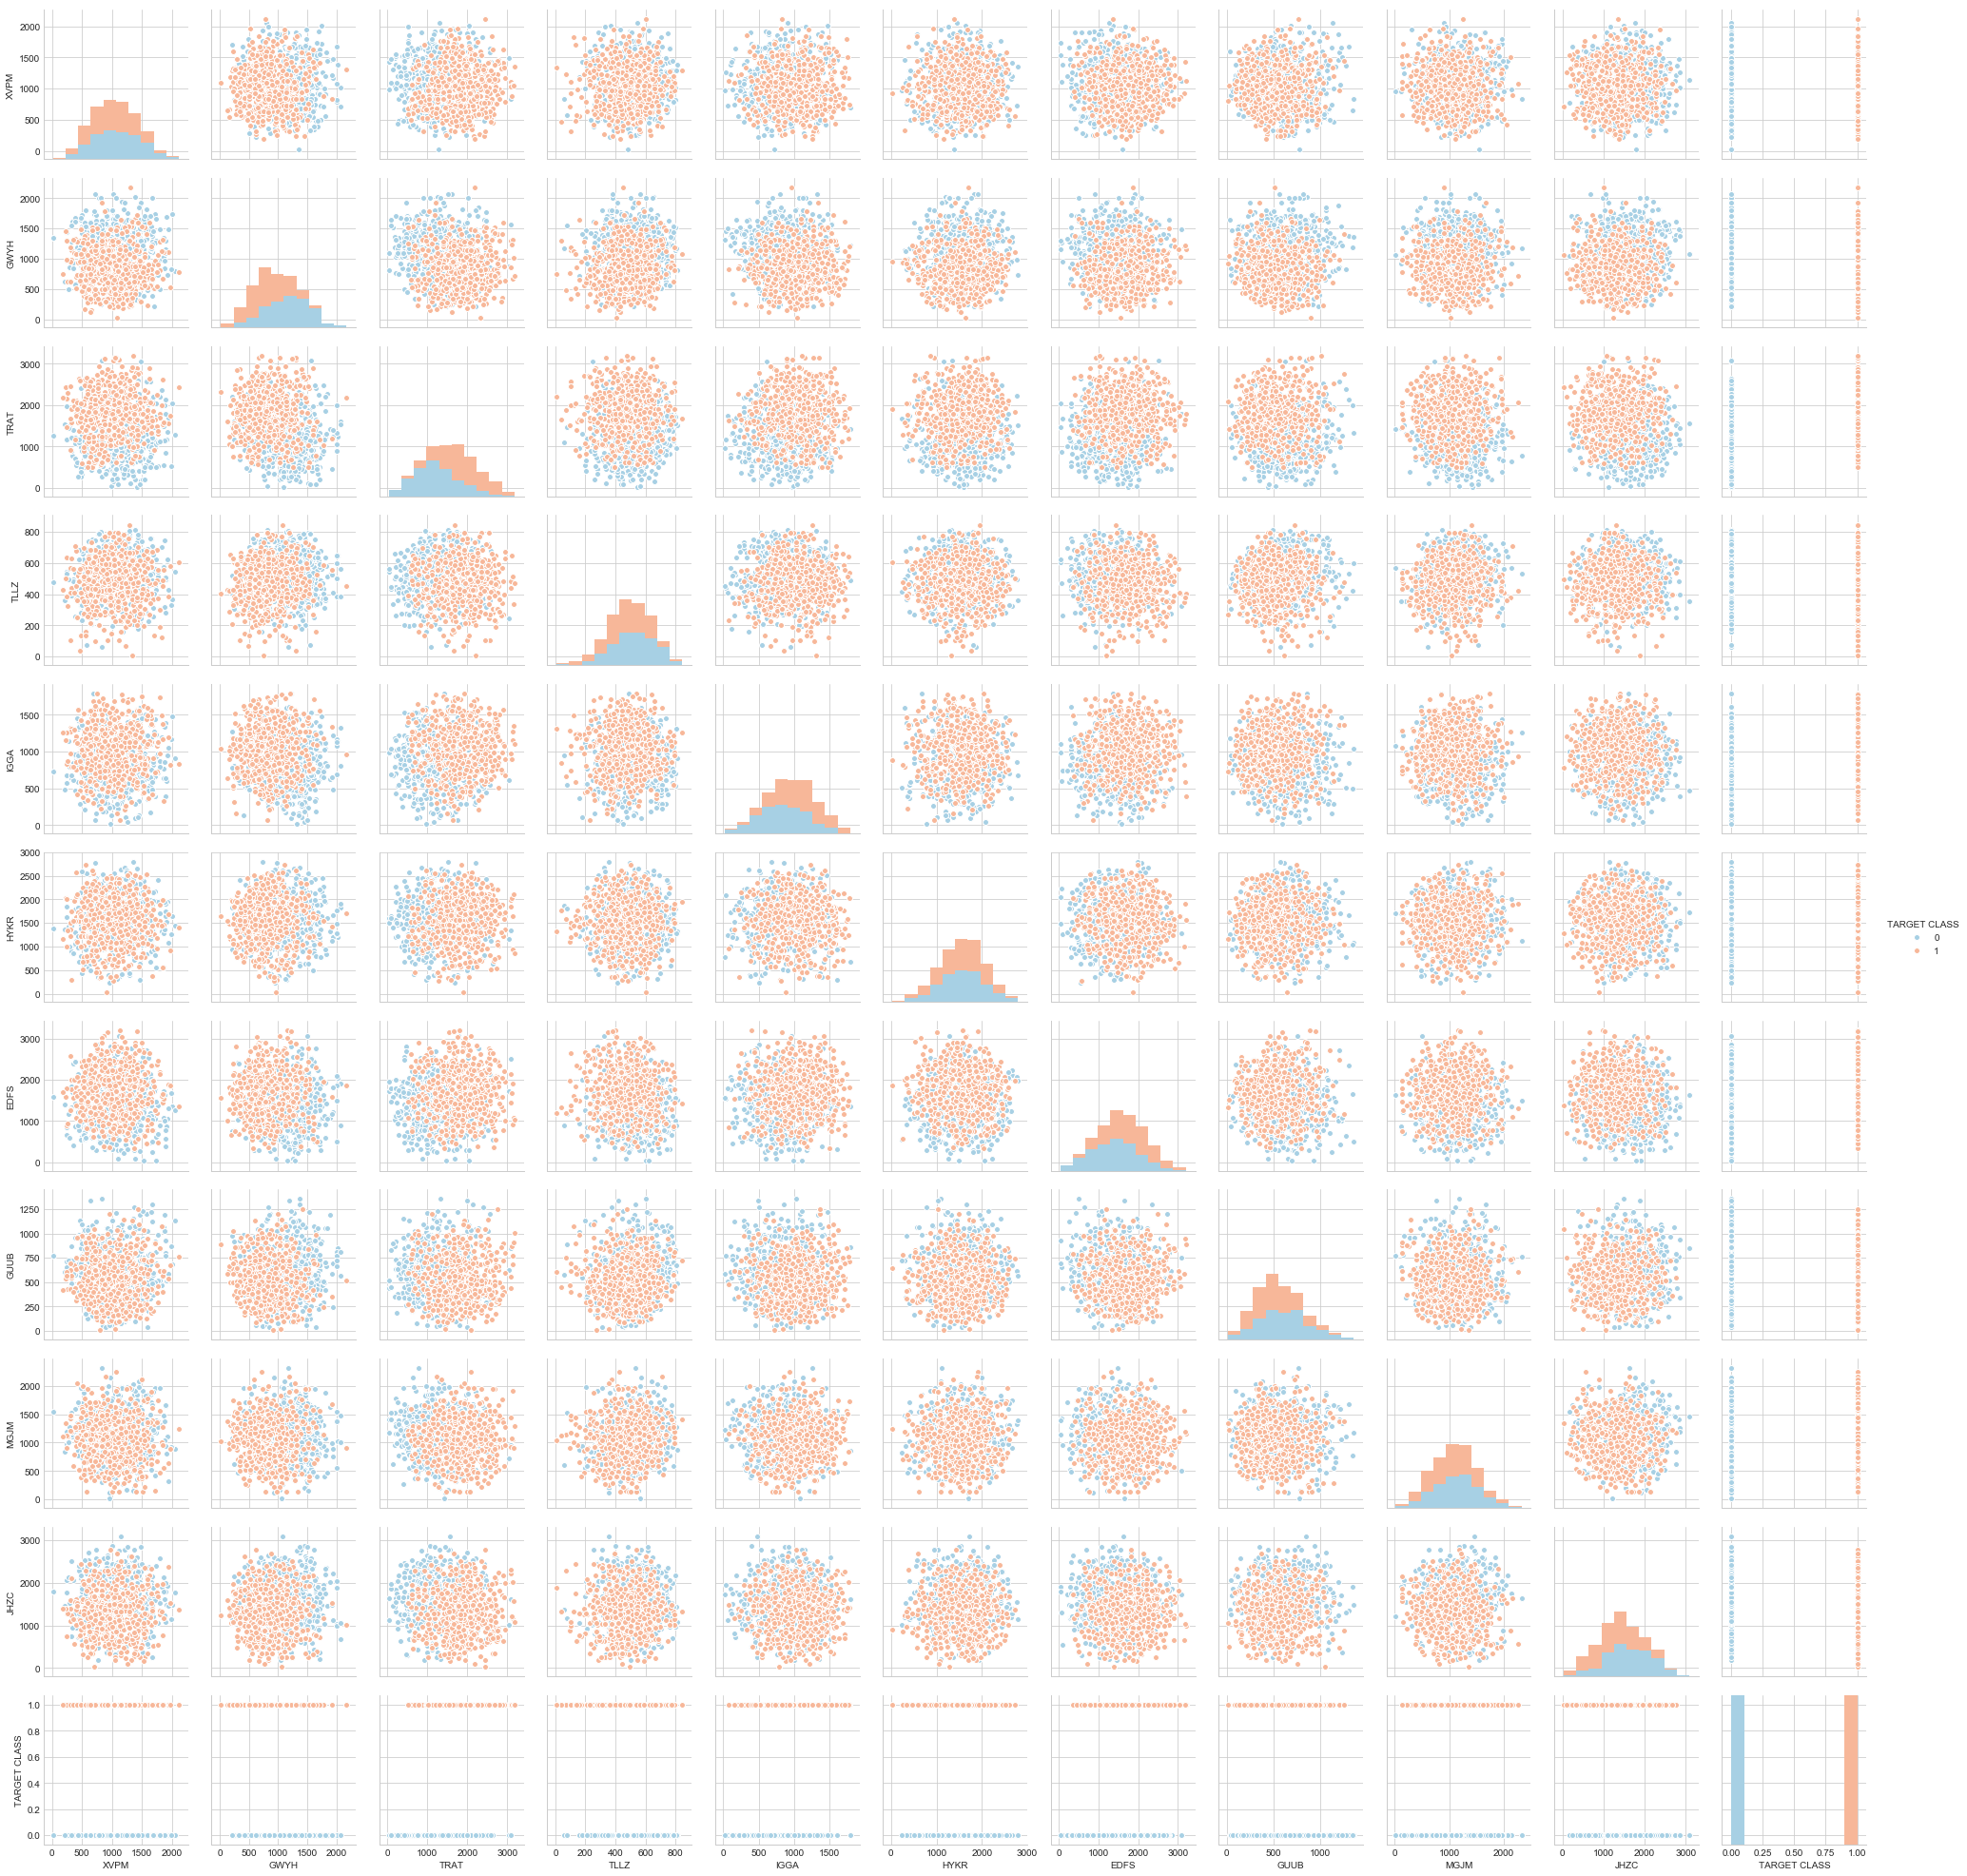

In [10]:
sns.set_style('whitegrid')
sns.pairplot(knn_df,hue='TARGET CLASS',palette='RdBu_r')

In [37]:
knn_df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scale= StandardScaler()

In [40]:
scale.fit(knn_df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
scale_feat = scale.transform(knn_df.drop('TARGET CLASS',axis=1))

In [42]:
df_feat = pd.DataFrame(scale_feat,columns=knn_df.columns[:-1])

In [43]:
knn_df.columns[:-1]

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')

In [44]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [45]:
from sklearn.cross_validation import train_test_split

In [46]:
X = df_feat
y= knn_df['TARGET CLASS']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [51]:
pred = knn.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [54]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300



In [69]:
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

Text(0,0.5,'Error Rates')

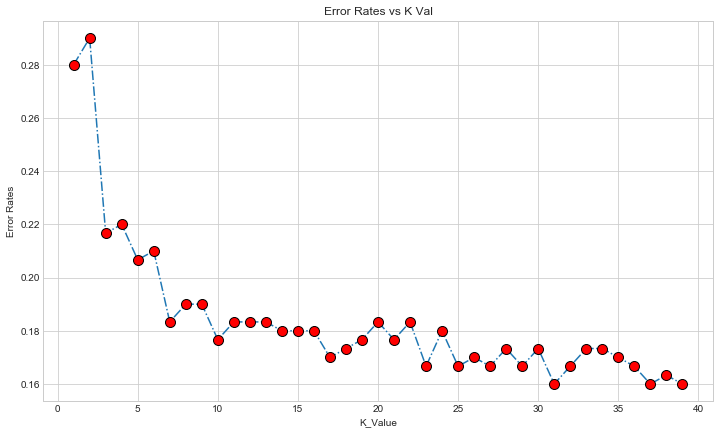

In [103]:
plt.figure(figsize=(12,7))
plt.plot(range(1,40),error_rate,marker='o',markerfacecolor='red',markeredgecolor='black',ls='-.',markersize=10)
plt.xlabel('K_Value')
plt.title('Error Rates vs K Val')
plt.ylabel('Error Rates')

In [77]:
knn = KNeighborsClassifier(n_neighbors=31)

In [78]:
from sklearn.cross_validation import train_test_split

In [80]:
X = df_feat
y= knn_df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors=31)

In [83]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')

In [84]:
pred = knn.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
print(confusion_matrix(y_test,pred))

[[123  29]
 [ 19 129]]


In [87]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.87      0.81      0.84       152
          1       0.82      0.87      0.84       148

avg / total       0.84      0.84      0.84       300



In [88]:
knn = KNeighborsClassifier(n_neighbors=30)

In [89]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [91]:
pred = knn.predict(X_test)

In [92]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[124  28]
 [ 24 124]]
             precision    recall  f1-score   support

          0       0.84      0.82      0.83       152
          1       0.82      0.84      0.83       148

avg / total       0.83      0.83      0.83       300



In [93]:
knn = KNeighborsClassifier(n_neighbors=39)

In [94]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=39, p=2,
           weights='uniform')

In [96]:
pred = knn.predict(X_test)

In [97]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[125  27]
 [ 21 127]]
             precision    recall  f1-score   support

          0       0.86      0.82      0.84       152
          1       0.82      0.86      0.84       148

avg / total       0.84      0.84      0.84       300

